# Mnist ——Machine Learning

*We will be using the MNIST dataset, which is a set of 70,000 small
images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mnist = pd.read_csv("train.csv")
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


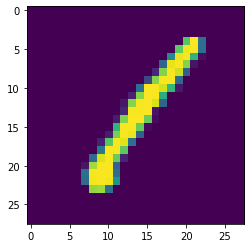

In [3]:
plt.imshow(mnist.iloc[0,1:].to_numpy().reshape(28,28))

In [4]:
mnist.iloc[50,1:].to_numpy().reshape(1,784)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [5]:
x = mnist.drop(columns=['label'])
y = mnist.label

In [6]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3)

In [7]:
import tensorflow as tf
%load_ext tensorboard

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

model.add(Dense(4,activation='sigmoid',input_shape=(784,)))
model.add(Dense(5,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
Total params: 3,183
Trainable params: 3,183
Non-trainable params: 0
_________________________________________________________________


2022-04-14 16:33:23.958844: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-14 16:33:23.960050: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [10]:
from tensorflow import keras
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


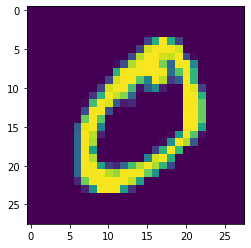

In [11]:
plt.imshow(x_train[1])

In [12]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(5,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                60        
Total params: 3,225
Trainable params: 3,225
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 50us/sample - loss: 1.6006 - accuracy: 0.4541
Epoch 2/50
60000/60000 [==============================] - 2s 37us/sample - loss: 1.1579 - accuracy: 0.5889
Epoch 3/50
60000/60000 [==============================] - 2s 38us/sample - loss: 1.0582 - accuracy: 0.6226
Epoch 4/50
60000/60000 [==============================] - 2s 37us/sample - loss: 1.0286 - accuracy: 0.6411
Epoch 5/50
60000/60000 [==============================] - 3s 42us/sample - loss: 1.0122 - accuracy: 0.6288
Epoch 6/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.9815 - accuracy: 0.6364
Epoch 7/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.9617 - accuracy: 0.6448
Epoch 8/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.9522 - accuracy: 0.6575
Epoch 9/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.9404 - accuracy: 0.6623
Epoch 10/50
60

In [16]:
model.fit(x_train,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.7998 - accuracy: 0.7353
Epoch 2/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.7968 - accuracy: 0.7400
Epoch 3/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.8002 - accuracy: 0.7372
Epoch 4/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.7899 - accuracy: 0.7423
Epoch 5/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.7829 - accuracy: 0.7418
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.7855 - accuracy: 0.7431
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.7978 - accuracy: 0.7366
Epoch 8/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.8030 - accuracy: 0.7373
Epoch 9/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.8268 - accuracy: 0.7295
Epoch 10/10
60

In [17]:
model.fit(x_train,y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 38us/sample - loss: 0.7969 - accuracy: 0.7397
Epoch 2/3
60000/60000 [==============================] - 2s 37us/sample - loss: 0.7946 - accuracy: 0.7397
Epoch 3/3
60000/60000 [==============================] - 2s 38us/sample - loss: 0.8085 - accuracy: 0.7344
